# Quantum Logical Comparison Circuit

THIS SHIT CURRENTLY DOES NOT WORK

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram

import numpy as np
from BoredQiskit import FastQiskit as fq
from BoredQiskit import FastOracles as fo

In [3]:
def encode_int_to_circuit(num: int, size: int):
    n = bin(num)[2:]
    n_len = len(n)
    qc = QuantumCircuit(size)
    for c, i in enumerate(n, 0):
        if i == '1':
            qc.x(n_len - c - 1)
    qc.name = str(num)
    return qc.to_gate()

def is_major_oracle(n: int):
    xr = QuantumRegister(n,'x')
    yr = QuantumRegister(1,'out')
    qc = QuantumCircuit(xr, yr)    
    
    for s in sol:
        for i in range(n):
            if s[i]=='0':
                qc.x(xr[i])
        qc.mcx(xr,yr[0])
        for i in range(n):
            if s[i]=='0':
                qc.x(xr[i])
    qc = qc.to_gate(label='  oracle  ')
    return qc    

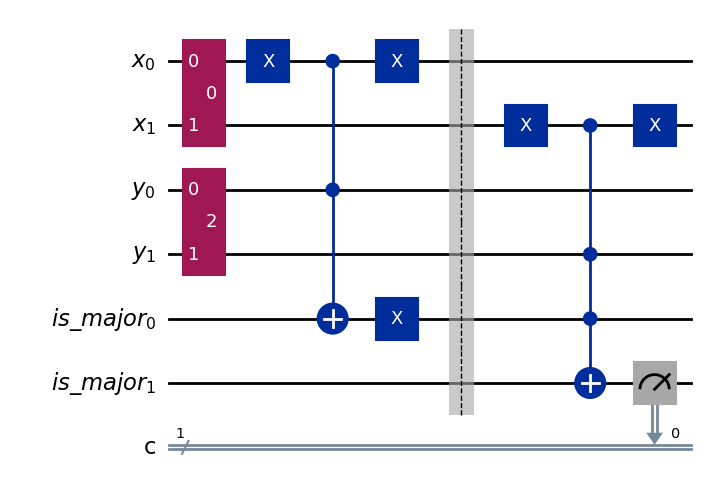

In [53]:
qx = QuantumRegister(2, 'x')
qy = QuantumRegister(2, 'y')
is_maj = QuantumRegister(2, 'is_major')

c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qx, qy, is_maj, c)

qc.compose(encode_int_to_circuit(0, 2), qx, inplace=True)
qc.compose(encode_int_to_circuit(2, 2), qy, inplace=True)

qc.x(qx[0])
qc.ccx(qx[0], qy[0], is_maj[0])
qc.x(is_maj[0])
qc.x(qx[0])
qc.barrier()
qc.x(qx[1])
qc.mcx([is_maj[0], qx[1], qy[1]], is_maj[1])
qc.x(qx[1])

qc.measure(is_maj[1], c)
qc.draw('mpl')

In [ ]:
counts = fq.run(qc, 1)
print(counts)

{'0': 1}


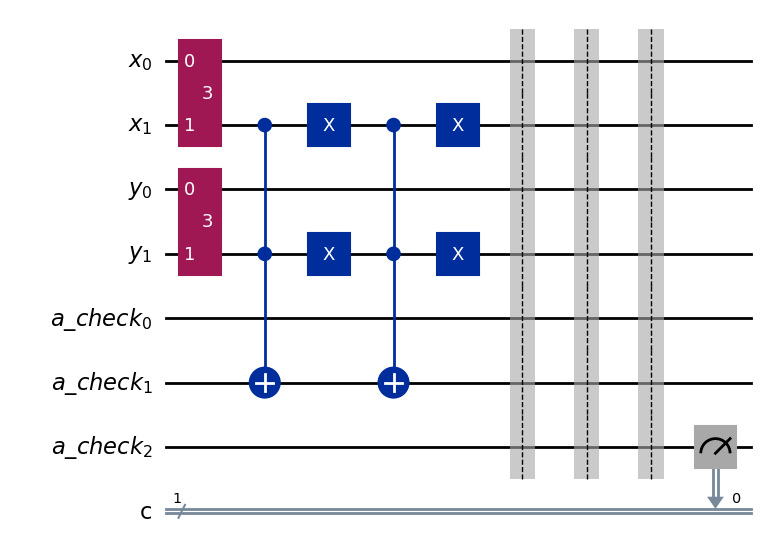

In [6]:
qx = QuantumRegister(2, 'x')
qy = QuantumRegister(2, 'y')
a = QuantumRegister(3, 'a_check')
c = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qx, qy, a, c)

qc.compose(encode_int_to_circuit(3, 2), qx, inplace=True)
qc.compose(encode_int_to_circuit(3, 2), qy, inplace=True)

qc.ccx(qx[1], qy[1], a[1])
qc.x([qx[1],qy[1]])
qc.ccx(qx[1], qy[1], a[1])
qc.x([qx[1],qy[1]])
qc.barrier()


qc.barrier()

qc.barrier()

qc.measure(a[2], c)

qc.draw('mpl')